In [1]:
"""Basic neural network"""
import torch
def activation(x):
    return 1/(1+torch.exp(-x))

torch.manual_seed(78)
features = torch.randn((1,5)) # matrix of 1*5, these are features
weights = torch.rand_like(features) # to create a random matrix with
# same dimensions as features

bias = torch.randn((1,1))
print(features)
print(weights)
print(bias)
# print(features.t())
print(torch.matmul(weights,features.t()))

# Calculating output
output = torch.matmul(weights, features.t()) + bias

y=activation((output))
print(y)

y1 = activation(torch.mm(weights, features.t()) + bias) 
# mm better than matmul, because mm gives error if something is not right
# but matmul doesn't.
print(y1)



# reshaping tensors
print("\n\n",features)
features = features.reshape(5,1)
print(features)
features = features.resize_(1,5)
print(features)
features = features.view(5,1) # best of lot
print(features)

tensor([[-0.6238, -1.2271, -0.1789, -1.3841,  0.8407]])
tensor([[0.7961, 0.9875, 0.1213, 0.3976, 0.8711]])
tensor([[-0.4036]])
tensor([[-1.5481]])
tensor([[0.1244]])
tensor([[0.1244]])


 tensor([[-0.6238, -1.2271, -0.1789, -1.3841,  0.8407]])
tensor([[-0.6238],
        [-1.2271],
        [-0.1789],
        [-1.3841],
        [ 0.8407]])
tensor([[-0.6238, -1.2271, -0.1789, -1.3841,  0.8407]])
tensor([[-0.6238],
        [-1.2271],
        [-0.1789],
        [-1.3841],
        [ 0.8407]])


In [2]:
# Neural network with hidden layer
torch.manual_seed(78)

features=torch.randn((1,3))
# print(features)

n_input = features.shape[1]   # no of input units
# print(n_input)

n_hidden = 2   # no of elements in hidden layer(only 1 hidden layer)
n_output = 1   # no of elements in putput 

# weights for inputs to hidden layer
w1 = torch.randn(n_input, n_hidden)   # 3,2
# print(w1)

# weights for hidden layer to output layers
w2 = torch.randn(n_hidden, n_output)  # 2,1
# print(w2)

# and bias terms for hidden and output layers
b1 = torch.randn(1, n_hidden)
# print(b1)
b2 = torch.randn(1, n_output)
# print(b2)

# calculating hidden layer nodes
h = activation(torch.mm( features,w1) + b1)
# print(torch.mm( features,w1) , b1)
print(h)

y = activation(torch.mm(h,w2) +b2)
print(y)

tensor([[0.6124, 0.9520]])
tensor([[0.2657]])


In [3]:
# Numpy and torch tensor , array conversion
import numpy as np
a = np.random.rand(4,3)
print(a)

b = torch.from_numpy(a)
print(b)

print(b.numpy())

# the memory is shared between numpy array and torch tensor, if we change
# values of one inplace then other's value will also change
print(b.mul_(2)) # .mul_ implice inplace , .mul is nor inplace
print(a)

[[0.02176012 0.42681666 0.44484458]
 [0.30227733 0.84809405 0.29347909]
 [0.98662679 0.70745863 0.07498191]
 [0.52711625 0.35272845 0.79364727]]
tensor([[0.0218, 0.4268, 0.4448],
        [0.3023, 0.8481, 0.2935],
        [0.9866, 0.7075, 0.0750],
        [0.5271, 0.3527, 0.7936]], dtype=torch.float64)
[[0.02176012 0.42681666 0.44484458]
 [0.30227733 0.84809405 0.29347909]
 [0.98662679 0.70745863 0.07498191]
 [0.52711625 0.35272845 0.79364727]]
tensor([[0.0435, 0.8536, 0.8897],
        [0.6046, 1.6962, 0.5870],
        [1.9733, 1.4149, 0.1500],
        [1.0542, 0.7055, 1.5873]], dtype=torch.float64)
[[0.04352024 0.85363332 0.88968915]
 [0.60455466 1.69618811 0.58695817]
 [1.97325358 1.41491725 0.14996382]
 [1.05423251 0.7054569  1.58729455]]


# Building large neural network on mnist dataset


In [4]:
from torchvision import datasets, transforms
import torch
import matplotlib.pyplot as plt

# print('Started')

# transform = transforms.Compose([transforms.ToTensor(), 
#                                transforms.Normalize((0.5,0.5,0.5), 
#                                                    (0.5,0.5,0.5)),])

# Because the data set is grayscale
transform = transforms.Compose([transforms.ToTensor(), 
                               transforms.Normalize((0.5,), 
                                                   (0.5,)),])





print(transform)
trainset = datasets.MNIST( 'MNIST_data/', download=True, train=True, transform=transform)
print(type(trainset), trainset)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
print("\n\n\n",type(trainloader), trainloader)

# The batch size is no of images we get in one iteration from data loader
# and pass through our network

Compose(
    ToTensor()
    Normalize(mean=(0.5,), std=(0.5,))
)
<class 'torchvision.datasets.mnist.MNIST'> Dataset MNIST
    Number of datapoints: 60000
    Root location: MNIST_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5,), std=(0.5,))
           )



 <class 'torch.utils.data.dataloader.DataLoader'> <torch.utils.data.dataloader.DataLoader object at 0x7f59621610d0>


In [5]:
dataiter = iter(trainloader)
print(dataiter)
images, labels = dataiter.next()
print(type(images))
print(images.shape)
print(labels.shape)


<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


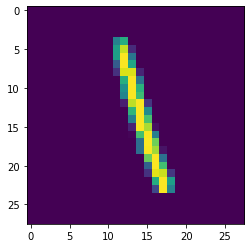

In [6]:
plt.imshow(images[1].numpy().squeeze())
# plt.imshow(images[15].numpy().squeeze(), cmap='Greys_r')

In [7]:
images = images.view(64,784)
# Another method to change size of inputs vector
# # print(images.shape[0])
# inputs = images.view(images.shape[0], -1)
# # print(inputs.shape)




# print(images.shape)
# We want to build, a hidden layer with 256 units, output layer with 10 units and input layer with 784 units

def activation(x):
    return 1/(1+torch.exp(-x))

n_input = 784
n_hidden = 256
n_output = 10
w1 = torch.randn((n_input, n_hidden)) 
# print(w1.shape)
w2 = torch.randn((n_hidden, n_output))

# b1 = torch.randn((1,n_hidden)) # wrong way
b1 = torch.randn(256) # correct way

# b2 = torch.randn((1,n_output))
b2 = torch.randn(n_output)

h = activation(torch.mm(images, w1) +b1)
# print(torch.mm(images, w1),b1,h)
y = torch.mm(h, w2) +b2
print(h.shape,y.shape)
print(y[0])

torch.Size([64, 256]) torch.Size([64, 10])
tensor([ -1.1026,  23.4447,   2.6175, -17.2043,  20.8516,  -7.4765,   2.3006,
         -0.5625,   6.4287, -16.1730])


In [8]:
def softmax(x):
    return torch.exp(x) / torch.sum(torch.exp(x), dim=1).view(-1,1)

# print(torch.exp(y).shape) # 64,10
# print(torch.sum(torch.exp(y))) # 1,1 it sums of ull 64,10 tensor
# print(torch.sum(torch.exp(y), dim=0).shape) # 10 it sums column wise
# print(torch.sum(torch.exp(y), dim=1).shape) # 64 it sums row wise
# print(torch.sum(torch.exp(y), dim=1).view(-1,1).shape) #64,1
# print(torch.sum(torch.exp(y), dim=1)) #1 row, 64 columns
# print(torch.sum(torch.exp(y), dim=1).view(-1,1)) # 64 rows with 1 cloumn

probabilities = softmax(y)
print("\n\n",probabilities.shape)
print(probabilities[0])
print(probabilities.sum(dim=1))



 torch.Size([64, 10])
tensor([2.0321e-11, 9.3041e-01, 8.3862e-10, 2.0656e-18, 6.9586e-02, 3.4656e-14,
        6.1084e-10, 3.4875e-11, 3.7910e-08, 5.7934e-18])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


# Large neural network with pytorch

In [9]:
from torch import nn

class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer, to perform linear transformation
        self.hidden = nn.Linear(784, 256)
        # taking inputs,multiply by weights, add bias is a linear
        # transformation
        # Output layer linear transformation
        self.output = nn.Linear(256, 10)
        
        # sigmoid and softmax function
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        # Passing input tensor through our operations
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        
        return x

In [10]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [11]:
# Using torch.nn.functional module to do it more cleanly
import torch.nn.functional as F
class Network1(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer, to perform linear transformation
        self.hidden = nn.Linear(784, 256)
        # Output layer linear transformation
        self.output = nn.Linear(256, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid function
        x = F.sigmoid(self.hidden(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x

In [12]:
model1 = Network1()
model1

Network1(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
)

# Multi-layer Neural net with ReLu activation

In [13]:
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer, to perform linear transformation
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        
        # Output layer linear transformation
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid function
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = F.softmax(self.output(x), dim=1)
        
        return x
model = Network()
print(model)

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (output): Linear(in_features=64, out_features=10, bias=True)
)


# Training neural network, and calculating loss

In [14]:
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        
        # Inputs to hidden layer, to perform linear transformation
        self.hidden1 = nn.Linear(784, 128)
        self.hidden2 = nn.Linear(128, 64)
        
        # Output layer linear transformation
        self.output = nn.Linear(64, 10)
        
    def forward(self, x):
        # Hidden layer with sigmoid function
        x = F.relu(self.hidden1(x))
        x = F.relu(self.hidden2(x))
        x = self.output(x)
        
        return x
model = Network()

# loss
criterion = nn.CrossEntropyLoss()

# calculating logits
# Logits is a function which operates on the unscaled output of earlier
# layers and on a linear scale to understand the linear units. In 
# Mathematics, Logits is a function that maps probabilities ( [0, 1] )
# to R ( (-inf, inf) ) .
print(images.shape)
logits = model(images)
print(logits.shape)
print(logits[0])
loss = criterion(logits, labels)
print(loss)

torch.Size([64, 784])
torch.Size([64, 10])
tensor([-0.2376,  0.0800, -0.1280,  0.1755,  0.1515,  0.0447, -0.0729,  0.1273,
        -0.1324, -0.0207], grad_fn=<SelectBackward>)
tensor(2.3066, grad_fn=<NllLossBackward>)


In [15]:
# using log-softmax as output activatio function and negative log likelihood
# loss as loss criterion
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1) #log softmax as output
                     )
# model

criterion = nn.NLLLoss() # calculating loss as negative log liklihood
# loss

log_probability = model(images)
print(log_probability[0])
loss = criterion(log_probability, labels)
print(loss)

tensor([-2.1262, -2.5900, -2.3197, -2.4384, -2.1363, -2.0870, -2.3810, -2.3205,
        -2.3346, -2.4035], grad_fn=<SelectBackward>)
tensor(2.3256, grad_fn=<NllLossBackward>)


# Autograd

In [16]:
# Performing back propagation using autograd. Autograd works by keeping 
# track of operations performed on tensors, then going backwards through
# those operations, calculating gradients along the way. But we have to
# set requires_grad parameter to True of tensor
# torch.no_grad() to revert
# torch.set_grad_enabled(True | False)
torch.manual_seed(78)
x = torch.randn(2, 2, requires_grad=True)
print(x)

y = x**2
print(y)

# To know ehich function generated variable y, pow function
print(y.grad_fn)

z = y.mean()
print(z)

print(x.grad,y.grad)
# currently grad og x,y are empty
# to calculate gradients we have to run backward on z, this will calculate
# gradient of z wrt x

z.backward()
print(x.grad)
print(x/2)

tensor([[-0.6238, -1.2271],
        [-0.1789, -1.3841]], requires_grad=True)
tensor([[0.3892, 1.5057],
        [0.0320, 1.9158]], grad_fn=<PowBackward0>)
tensor(0.9607, grad_fn=<MeanBackward0>)
None None
tensor([[-0.3119, -0.6135],
        [-0.0895, -0.6921]])
tensor([[-0.3119, -0.6135],
        [-0.0895, -0.6921]], grad_fn=<DivBackward0>)


In [17]:
# Loss and autograd
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
images, labels = next(iter(trainloader))
images = images.view(images.shape[0], -1)

log_prob = model(images)
loss = criterion(log_prob, labels)

print('Before backward pass:\n', model[0].weight.grad)

loss.backward()

print(' After backward pass:\n', model[0].weight.grad)

Before backward pass:
 None
 After backward pass:
 tensor([[ 0.0029,  0.0029,  0.0029,  ...,  0.0029,  0.0029,  0.0029],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0002,  0.0002,  0.0002],
        ...,
        [-0.0021, -0.0021, -0.0021,  ..., -0.0021, -0.0021, -0.0021],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005]])


In [18]:
# Upgrading weights using optimizers, like optim.SGD (stochastic gradient
# descent)
from torch import optim

# optimizers require parameters to optimize and a learning rate
optimizer = optim.SGD(model.parameters(), lr=0.1)

# The general process of training
"""1) Make a forward pass through network.
2) Use network output to calculate loss
3) Perform backward pass through network with loss.backward() to calculate
gradients
4) Take a step with optimizer to update weights."""

print('Initial weights - ', model[0].weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear gradients, it is required because gradients are accumulated,
# it is called before every training pass
optimizer.zero_grad()

output = model.forward(images)
loss = criterion(output, labels)
loss.backward()
print('Gradient -', model[0].weight.grad)

Initial weights -  Parameter containing:
tensor([[-0.0274,  0.0156,  0.0121,  ..., -0.0352,  0.0251,  0.0153],
        [-0.0166,  0.0113, -0.0022,  ..., -0.0041, -0.0097, -0.0180],
        [-0.0202, -0.0013,  0.0287,  ...,  0.0140,  0.0125, -0.0102],
        ...,
        [-0.0299,  0.0229, -0.0042,  ..., -0.0220,  0.0047, -0.0133],
        [ 0.0085, -0.0207,  0.0202,  ...,  0.0053,  0.0309,  0.0026],
        [-0.0190,  0.0194, -0.0260,  ...,  0.0096,  0.0197,  0.0052]],
       requires_grad=True)
Gradient - tensor([[ 0.0028,  0.0028,  0.0028,  ...,  0.0028,  0.0028,  0.0028],
        [-0.0008, -0.0008, -0.0008,  ..., -0.0008, -0.0008, -0.0008],
        [ 0.0029,  0.0029,  0.0029,  ...,  0.0029,  0.0029,  0.0029],
        ...,
        [-0.0005, -0.0005, -0.0005,  ..., -0.0005, -0.0005, -0.0005],
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [ 0.0014,  0.0014,  0.0014,  ...,  0.0014,  0.0014,  0.0014]])


In [19]:
# Take update ste to update weights
optimizer.step()
print('Updated weights -', model[0].weight)

Updated weights - Parameter containing:
tensor([[-0.0277,  0.0154,  0.0118,  ..., -0.0355,  0.0248,  0.0150],
        [-0.0166,  0.0114, -0.0021,  ..., -0.0040, -0.0096, -0.0180],
        [-0.0205, -0.0016,  0.0284,  ...,  0.0137,  0.0122, -0.0105],
        ...,
        [-0.0299,  0.0229, -0.0041,  ..., -0.0220,  0.0047, -0.0132],
        [ 0.0085, -0.0208,  0.0201,  ...,  0.0052,  0.0308,  0.0026],
        [-0.0192,  0.0193, -0.0262,  ...,  0.0095,  0.0195,  0.0051]],
       requires_grad=True)


# Training the whole MNIST dataset

In [20]:
model = nn.Sequential(nn.Linear(784, 128),
                     nn.ReLU(),
                     nn.Linear(128, 64),
                     nn.ReLU(),
                     nn.Linear(64, 10),
                     nn.LogSoftmax(dim=1))

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003)

epochs = 5
for e in range(epochs):
    running_loss = 0
    for images, labels in trainloader:
        # print(images.shape[0]) # 64
        images = images.view(images.shape[0], -1)
        # print(images.shape) # [64, 784]
        
        optimizer.zero_grad() # it is very important step

        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    else:
        print("Training loss:", running_loss/len(trainloader))
        

Training loss: 1.8967233725956507
Training loss: 0.8649482572002452
Training loss: 0.5397959950445558
Training loss: 0.4401901340179606
Training loss: 0.3918095511445867


<Figure size 432x288 with 0 Axes>

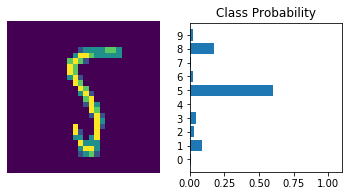

In [37]:
# import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    ''' Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze())
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))
    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

plt.tight_layout()

images, labels = next(iter(trainloader))
img = images[0].view(1, 784)

# Turning off gradients to spped up this part
with torch.no_grad():
    logits = model.forward(img)
    
# output of this network are logits, need to take softmax for probabilities
prob = F.softmax(logits, dim=1)
view_classify(img.view(1, 28, 28), prob)

In [28]:
# help(helper)